In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:

# Set the directory path where the CSV files are located
directory_path = r'D:\Projects\singapure'


df = pd.concat([pd.read_csv(file) for file in glob.glob(os.path.join(directory_path, '*.csv'))], ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
914676,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,NaN
914677,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,NaN
914678,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,NaN
914679,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,NaN


In [3]:
df.storey_range.unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '46 TO 48',
       '43 TO 45', '49 TO 51', '06 TO 10', '01 TO 05', '11 TO 15',
       '16 TO 20', '21 TO 25', '26 TO 30', '36 TO 40', '31 TO 35'],
      dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914681 entries, 0 to 914680
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                914681 non-null  object 
 1   town                 914681 non-null  object 
 2   flat_type            914681 non-null  object 
 3   block                914681 non-null  object 
 4   street_name          914681 non-null  object 
 5   storey_range         914681 non-null  object 
 6   floor_area_sqm       914681 non-null  float64
 7   flat_model           914681 non-null  object 
 8   lease_commence_date  914681 non-null  int64  
 9   resale_price         914681 non-null  float64
 10  remaining_lease      205631 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.8+ MB


In [5]:
df.isnull().sum()


month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [6]:
df.nunique()

month                   408
town                     27
flat_type                 8
block                  2696
street_name             584
storey_range             25
floor_area_sqm          210
flat_model               34
lease_commence_date      56
resale_price           9343
remaining_lease         720
dtype: int64

In [7]:
df.drop('remaining_lease',axis=1,inplace=True)

In [8]:
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914681 entries, 0 to 914680
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                914681 non-null  object 
 1   town                 914681 non-null  object 
 2   flat_type            914681 non-null  object 
 3   block                914681 non-null  object 
 4   street_name          914681 non-null  object 
 5   storey_range         914681 non-null  object 
 6   floor_area_sqm       914681 non-null  float64
 7   flat_model           914681 non-null  object 
 8   lease_commence_date  914681 non-null  int64  
 9   resale_price         914681 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 69.8+ MB


In [10]:
cat_column = [col for col in df.columns if df[col].dtype == "object"]
num_column = [col for col in df.columns if df[col].dtype != "object"]

In [11]:
for col in cat_column:
    print(col,'-',len(df[col].unique()))

month - 408
town - 27
flat_type - 8
block - 2696
street_name - 584
storey_range - 25
flat_model - 34


In [12]:
for num in num_column:
    print(num,'-',len(df[num].unique()))

floor_area_sqm - 210
lease_commence_date - 56
resale_price - 9343


In [13]:
df.drop(['block','street_name'],axis=1,inplace=True)

In [14]:
df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200.0


In [15]:
df['year'] = df['month'].apply(lambda x: int(str(x)[:4]))
df['month'] = df['month'].apply(lambda x: int(str(x)[-2:]))

In [16]:
df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
0,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,1990
1,1,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,1990
2,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000.0,1990
3,1,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000.0,1990
4,1,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990


In [17]:
df.year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2013,
       2014], dtype=int64)

In [18]:
df.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [19]:
df.isna().sum()

month                  0
town                   0
flat_type              0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
year                   0
dtype: int64

<Axes: xlabel='floor_area_sqm', ylabel='resale_price'>

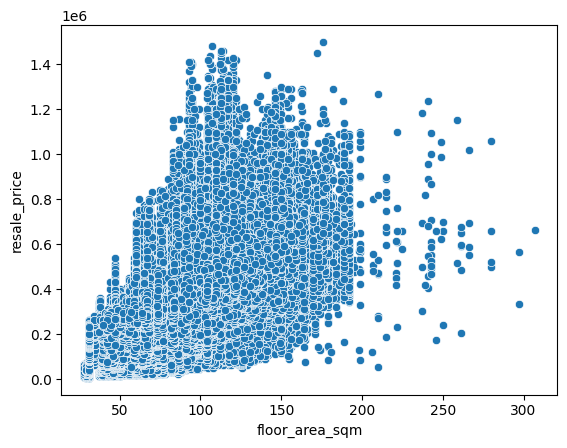

In [20]:
sns.scatterplot(data = df, x = "floor_area_sqm", y = "resale_price")

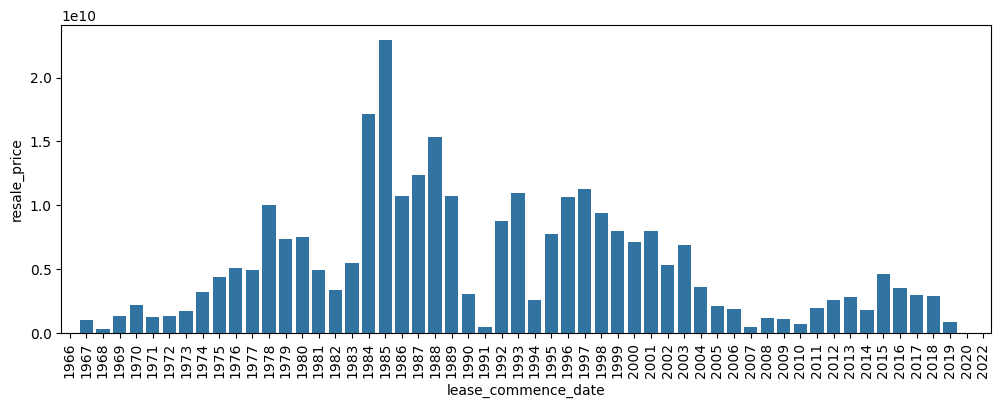

In [21]:
plt.figure(figsize=(12,4))
a = df.groupby('lease_commence_date')['resale_price'].sum()
a = pd.DataFrame(a)
sns.barplot(data=a,x=a.index,y='resale_price')
plt.xticks(rotation=90)
plt.show()

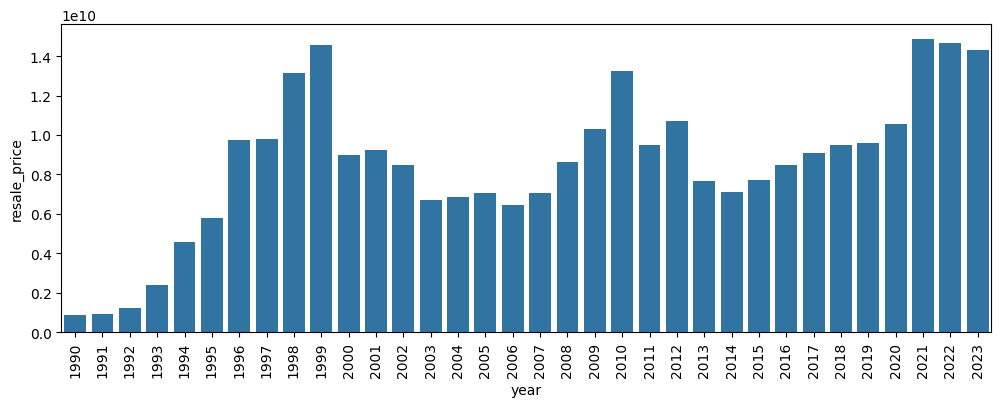

In [22]:
plt.figure(figsize=(12,4))
a = df.groupby('year')['resale_price'].sum()
a = pd.DataFrame(a)
sns.barplot(data=a,x=a.index,y='resale_price')
plt.xticks(rotation=90)
plt.show()

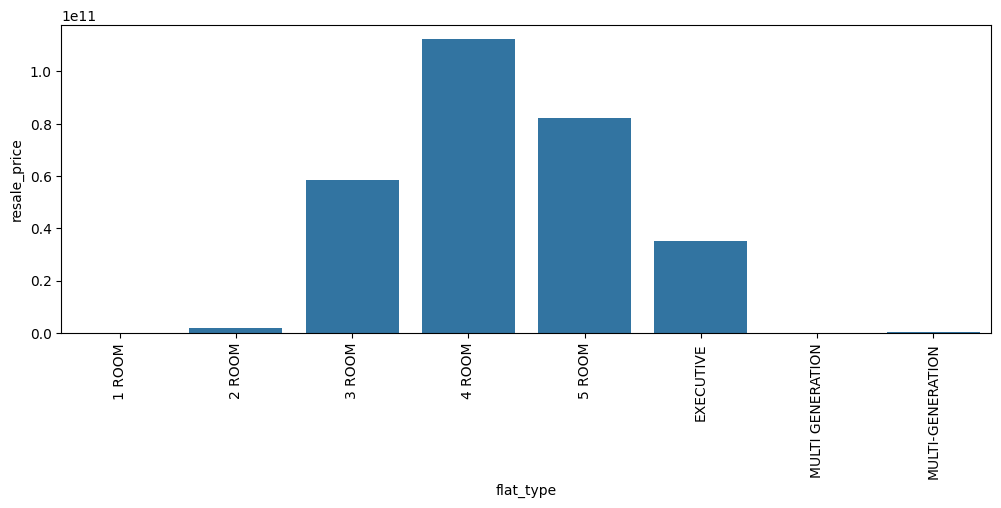

In [23]:
plt.figure(figsize=(12,4))
a = df.groupby('flat_type')['resale_price'].sum()
a = pd.DataFrame(a)
sns.barplot(data=a,x=a.index,y='resale_price')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='year'>

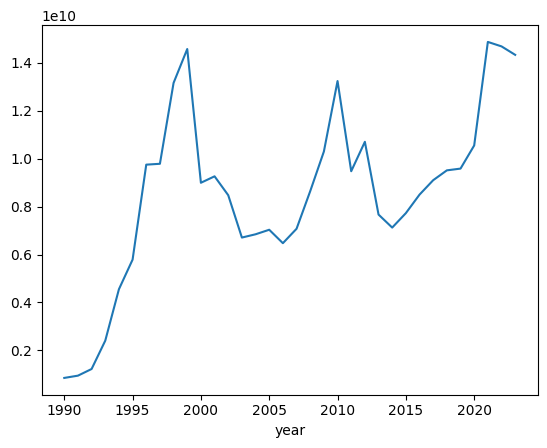

In [24]:
df.groupby('year').sum()['resale_price'].plot(kind='line')

<Axes: xlabel='lease_commence_date'>

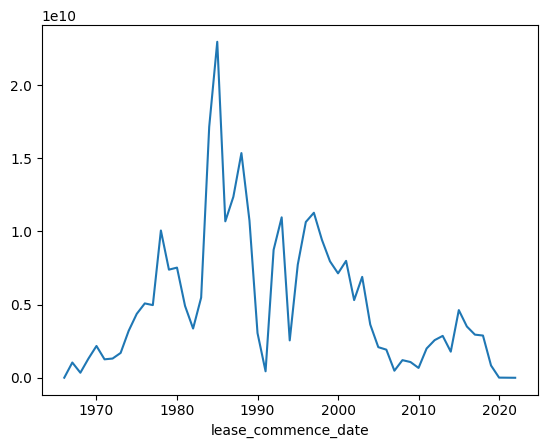

In [25]:
df.groupby('lease_commence_date').sum()['resale_price'].plot(kind='line')

In [26]:
scope_df = df[['floor_area_sqm','lease_commence_date','resale_price']]
scope_df

,floor_area_sqm,lease_commence_date,resale_price
0,31.0,1977,9000.0
1,31.0,1977,6000.0
2,31.0,1977,8000.0
3,31.0,1977,6000.0
4,73.0,1976,47200.0
...,...,...,...
914676,122.0,1988,580000.0
914677,146.0,1988,540000.0
914678,164.0,1992,738000.0
914679,152.0,1985,592000.0


In [27]:
scope_df = scope_df.drop_duplicates()
scope_df

,floor_area_sqm,lease_commence_date,resale_price
0,31.0,1977,9000.0
1,31.0,1977,6000.0
2,31.0,1977,8000.0
4,73.0,1976,47200.0
5,67.0,1977,46000.0
...,...,...,...
914661,84.0,1987,341500.0
914665,123.0,1984,426000.0
914670,111.0,2000,504000.0
914675,127.0,1987,500000.0


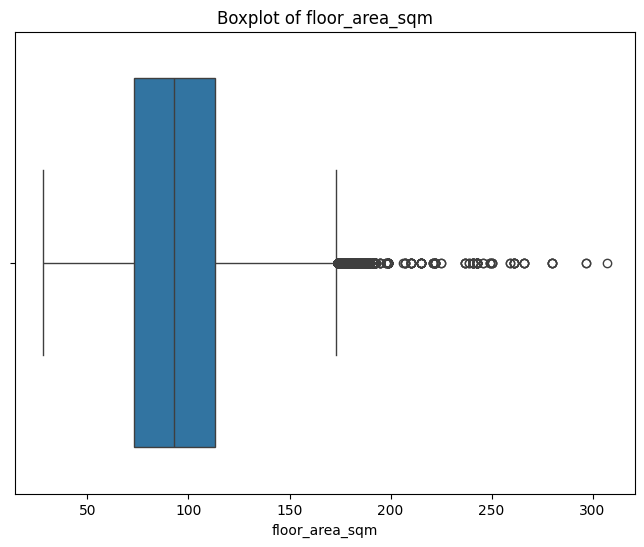

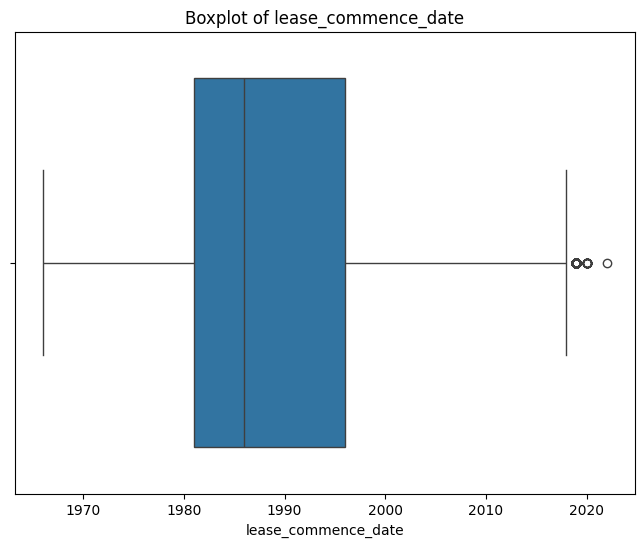

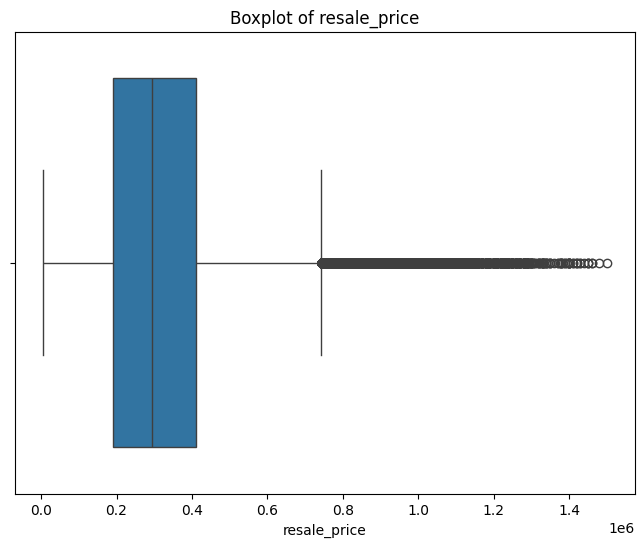

In [28]:
import seaborn as sb
import matplotlib.pyplot as plt 

col = ['floor_area_sqm','lease_commence_date','resale_price']

for i in col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

In [29]:
df1 = scope_df


In [30]:
df1

,floor_area_sqm,lease_commence_date,resale_price
0,31.0,1977,9000.0
1,31.0,1977,6000.0
2,31.0,1977,8000.0
4,73.0,1976,47200.0
5,67.0,1977,46000.0
...,...,...,...
914661,84.0,1987,341500.0
914665,123.0,1984,426000.0
914670,111.0,2000,504000.0
914675,127.0,1987,500000.0


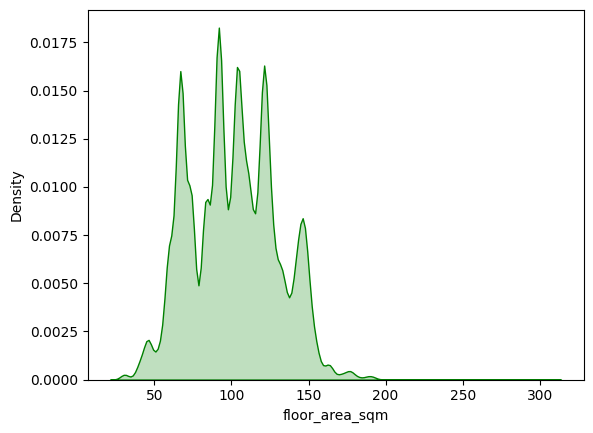

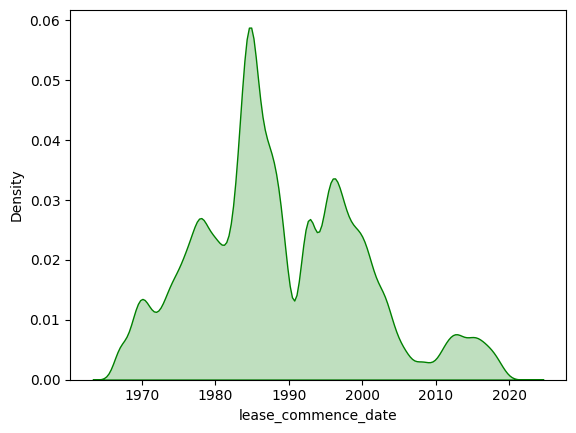

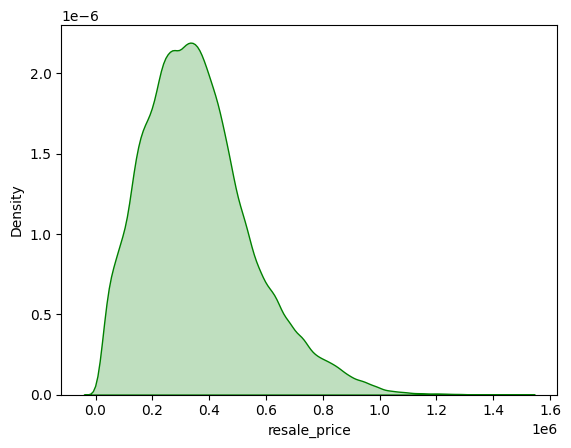

In [31]:
for i in df1.columns:
    sns.kdeplot(data=df1[i],fill=True,color="g")
    plt.show()

<Axes: title={'center': 'Correlation Heatmap'}>

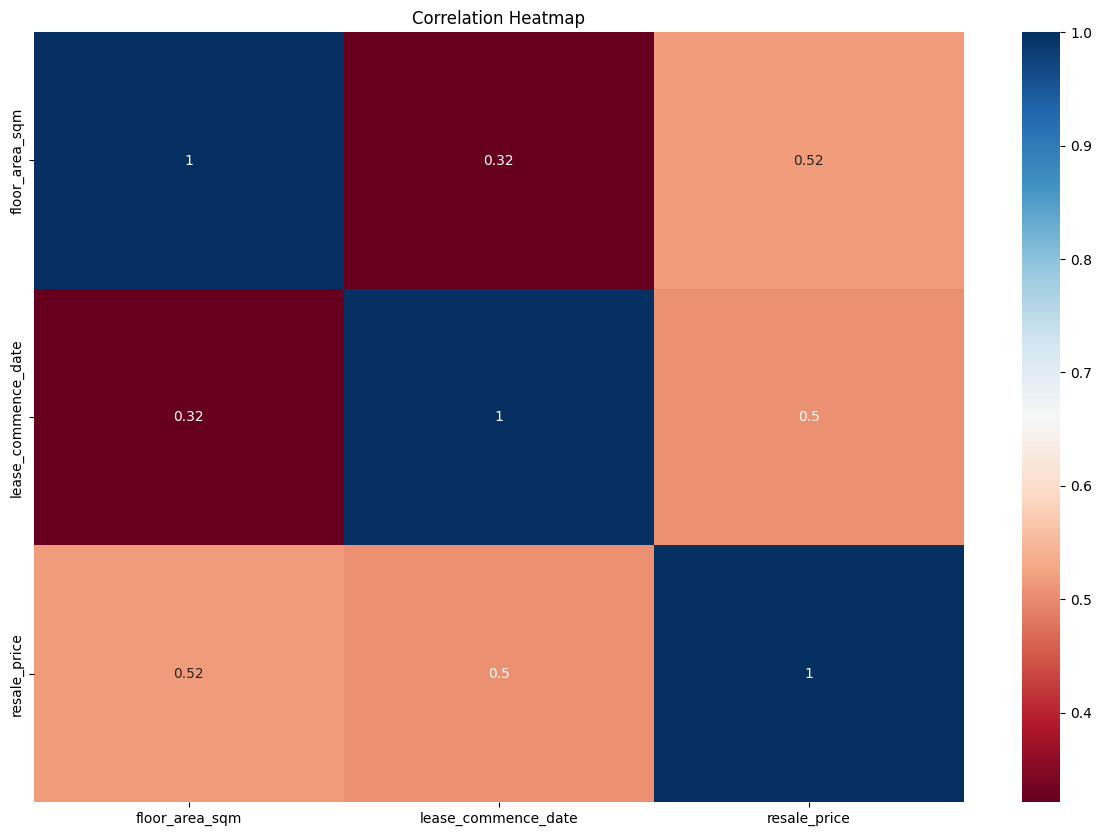

In [32]:
import seaborn as sns

corrMatrix = df1.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix, 
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu', 
    annot=True
)

In [33]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

object_columns = df.select_dtypes(include=['object']).columns

df[object_columns] = df[object_columns].astype(str)

df[object_columns] = ordinal_encoder.fit_transform(df[object_columns])


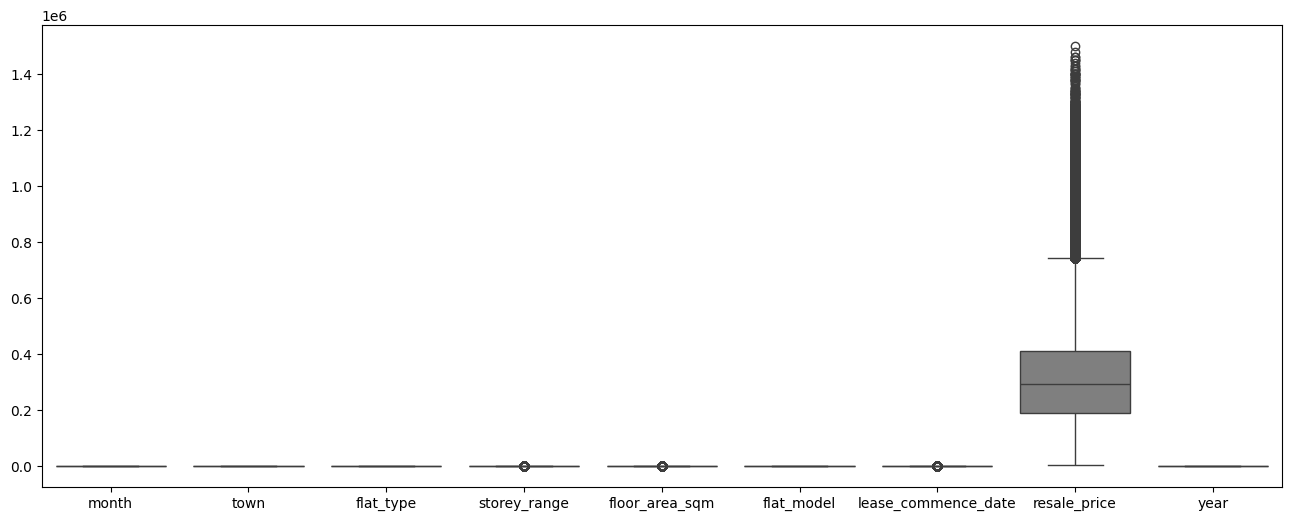

In [34]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df)
plt.show()

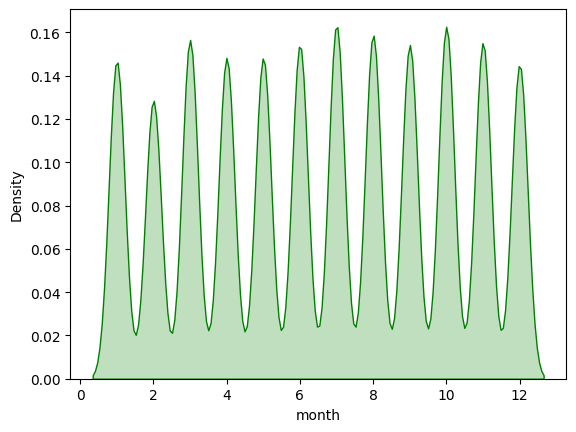

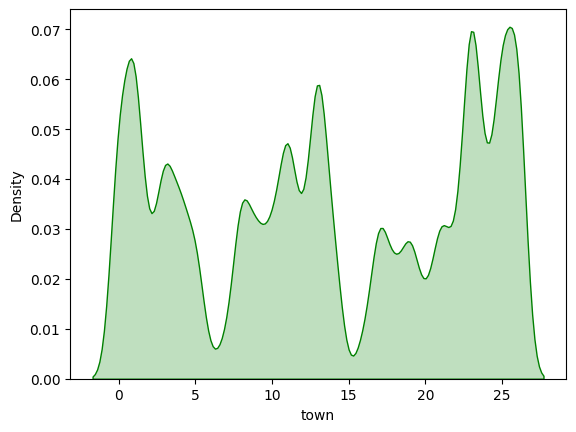

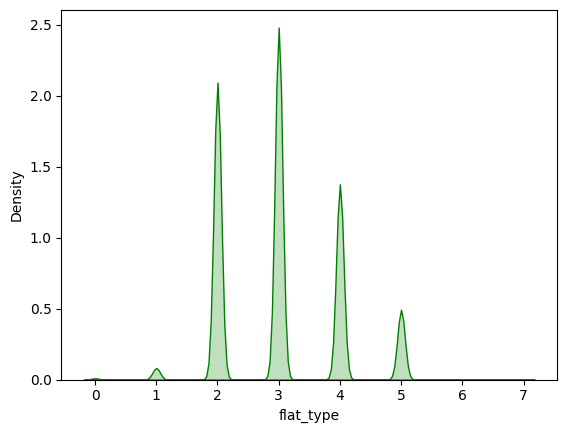

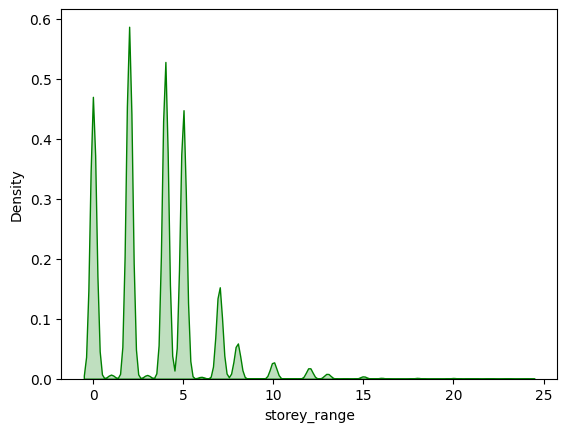

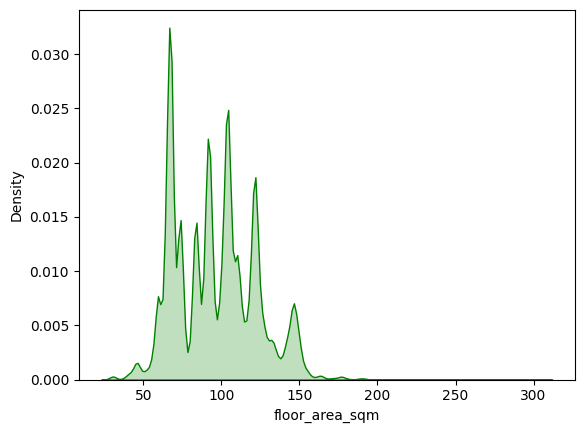

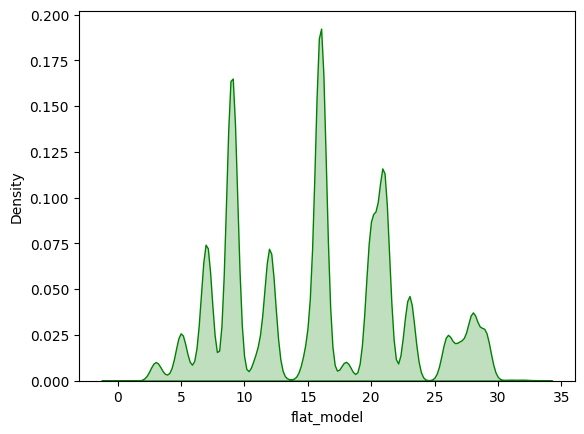

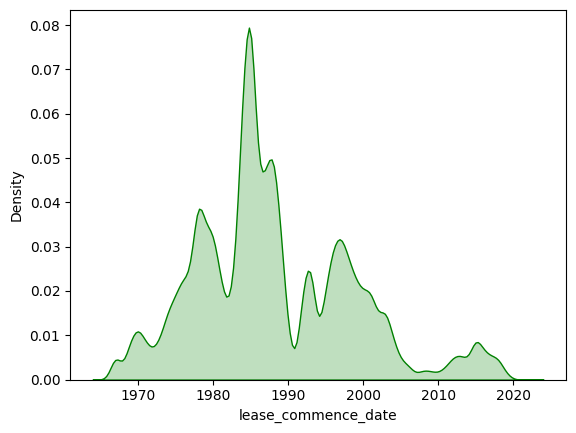

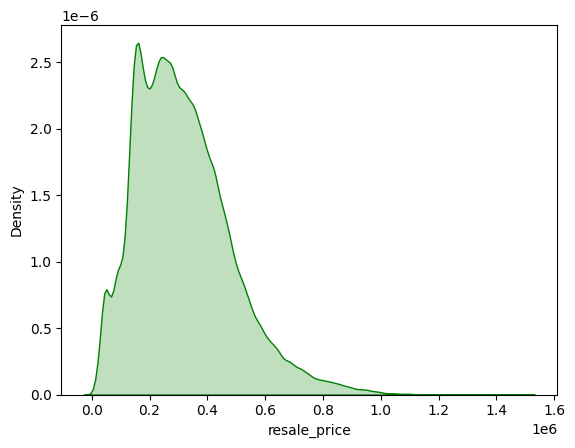

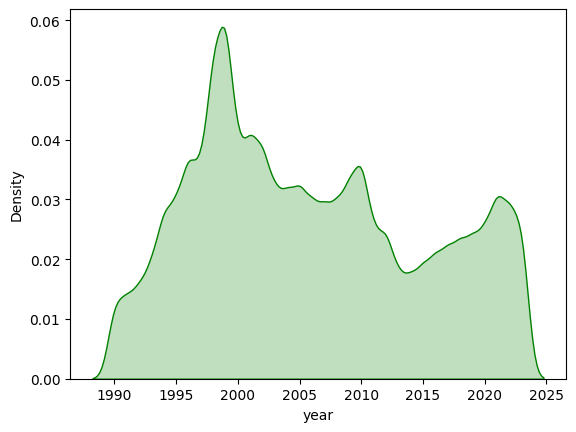

In [35]:
for i in df.columns:
    sns.kdeplot(data=df[i],fill=True,color="g")
    plt.show()

<Axes: title={'center': 'Correlation Heatmap'}>

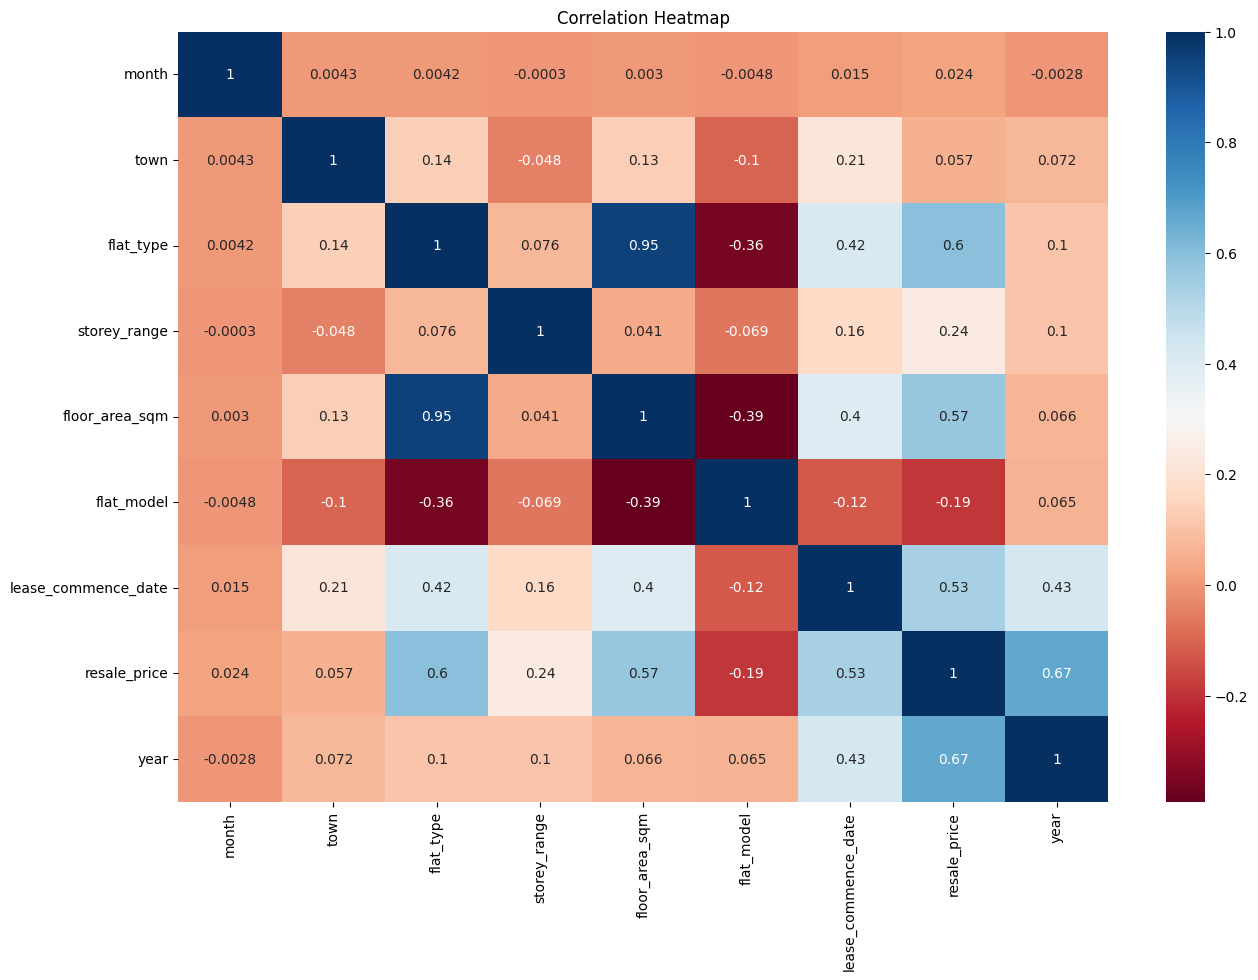

In [36]:
import seaborn as sns

corrMatrix = df.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix, 
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu', 
    annot=True
)

In [37]:
df.drop(['town','flat_type','flat_model'],axis=1,inplace=True)

In [38]:
X = df.drop("resale_price",axis=1)
Y = df['resale_price']

In [39]:
X.head()

,month,storey_range,floor_area_sqm,lease_commence_date,year
0,1,5.0,31.0,1977,1990
1,1,2.0,31.0,1977,1990
2,1,5.0,31.0,1977,1990
3,1,4.0,31.0,1977,1990
4,1,2.0,73.0,1976,1990


In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [41]:
print(X_train.shape, X_test.shape)


(640276, 5) (274405, 5)


In [42]:
from sklearn.linear_model import LinearRegression

model_LG = LinearRegression()
model_LG.fit(X_train,Y_train)

LinearRegression()

In [43]:
predection = model_LG.predict(X_test)

In [44]:
from sklearn.metrics import r2_score

r2_score(Y_test,predection)

0.7493352506557536

In [45]:
pred = model_LG.predict(X_train)
r2_score(Y_train,pred)

0.750324803314651

In [46]:
from sklearn.tree import DecisionTreeRegressor
model_DT = DecisionTreeRegressor()
model_DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [47]:
Y_pred = model_DT.predict(X_test)
r2_score(Y_test,Y_pred)

0.851866618666725

In [48]:
Yt_pred = model_DT.predict(X_train)
r2_score(Y_train,Yt_pred)

0.9793381625729021

In [49]:
from sklearn.metrics import mean_absolute_error as mae
mae(Y_test,Y_pred)/df['resale_price'].max()

0.026254748097551905

In [50]:
df.columns

Index(['month', 'storey_range', 'floor_area_sqm', 'lease_commence_date',
       'resale_price', 'year'],
      dtype='object')

In [51]:
import pickle
with open('DTR_model.pkl', 'wb') as file:
      pickle.dump(model_DT,file)

In [52]:
df.tail()

,month,storey_range,floor_area_sqm,lease_commence_date,resale_price,year
914676,12,5.0,122.0,1988,580000.0,2014
914677,12,5.0,146.0,1988,540000.0,2014
914678,12,4.0,164.0,1992,738000.0,2014
914679,12,4.0,152.0,1985,592000.0,2014
914680,12,2.0,146.0,1985,545000.0,2014


In [53]:
print(df.floor_area_sqm.min())
print(df.floor_area_sqm.max())

28.0
307.0


In [54]:
month = 7

storey_range = 5.0
floor_area_sqm = 122.0

lease_commence_date = 1988
year = 2014

In [61]:
model_DT.predict(np.array([[7,122.0,1988,2018,2.0]]))

c:\Users\hemar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([127000.])